### Linear Regression Modeling Lab

This lab will walk you through the basics of building a linear regression model out of a training and test set using a variety of techniques, including:

 - estimating distributional fit
 - onehot and target encoding
 - measuring progress with cross validation scores
 - creating a custom loss function
 - properly using inferences from the training set to transform the test set
 
**Some of these columns might have missing values.  Decide on the best approach for filling them in based on what we did from last class.**

#### Step 1).  Upload the training and test set from the `\movies` folder inside the `\Data` folder

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import display
pd.options.display.max_columns = None
from scipy.stats import probplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot

In [3]:
train = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/movies/train.csv')
test = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/movies/test.csv')

In [4]:
train.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0


#### Step 2).  Using a Custom Loss Function

To avoid some of the pitfalls of using a loss function that measures squared error, we're going to modify it a little bit.  This is also a useful skill in practice because lots of projects will require something precise that's not available out-of-the-box in a library.

`Scitkit-Learn` allows for custom loss functions relatively easily

We're going to instead use the **mean squared log error**.  It has the following form:

$$ \frac{\sum{log_{e}(y - \bar{y})^2}}{n} $$

The easiest way to do this is the following:

 - take the log of y using `np.log1p` to avoid the hassles of dealing with negative values
 - fit your model to that, and then calculate the resulting mean squared error
 
So your job is two fold:
 - log transform the target variable (revenue)
 - create a function called `mean_squared_log_error` according to the specifications defined here:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, under the heading for the `scoring` argument
 - to test that you did this correctly, run a 10-fold univariate linear regression on the training set using the `popularity` column as `X` and `revenue` as y.  The correct value should be 60.7.

In [5]:
y = np.log1p(train['revenue'])
X = train[['popularity']]

In [6]:
def root_mean_squared_error(model, X, y):
    error = model.predict(X) - y
    mse = np.mean(error**2)
    return mse

In [7]:
def mean_squared_log_error(model, X, y):
    # our error
    error = model.predict(X) - y
    # the average value of its square
    mse = np.mean(error**2)
    return mse

lreg = LinearRegression()

In [8]:
score = cross_val_score(estimator=lreg, X=X, y=y, scoring=root_mean_squared_error, cv=10)
score.mean()

60.730273931644206

#### Step 3).  Distributional Inference of Your Continuous Variables

This dataset is far from normal.  Use the `probplot()` method to find the *least* normal variable among your numeric variables, judging by the r-squared value of the resulting line.  

Then, see if log-transforming improves its behavior at all.  Use a comparison between your validation scores in a univariate regression between the treated and untreated versions of the variable as your indicator of whether or not this made anything better.

In [9]:
train._get_numeric_data().columns.to_list()

['id',
 'popularity',
 'budget',
 'runtime',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue']

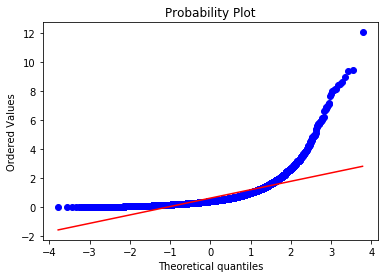

In [10]:
vals, model = probplot(train.popularity, plot=plt)

In [11]:
model

(0.5800209126522571, 0.6009993374689825, 0.7759321140913117)

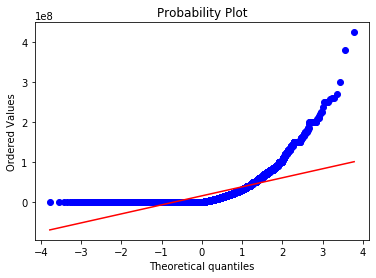

In [12]:
vals, model = probplot(train.budget, plot=plt)

In [13]:
model

(22611249.701404847, 15104928.043424312, 0.7484030236487506)

id
(2502.4269779553483, 4432.499999999999, 0.9773521960408322)
popularity
(0.5800209126522571, 0.6009993374689825, 0.7759321140913117)
budget
(22611249.701404847, 15104928.043424312, 0.7484030236487506)
runtime
(25.84822019588308, 103.2156553124295, 0.7979080090154935)
vote_count
(317.1854691762457, 197.17933679223992, 0.5965756297041135)
vote_average
(0.8969423835073336, 5.991901646740357, 0.9934328572787294)
release_year
(11.735995233694222, 1998.4689826302729, 0.9368789697671646)
budget_adj
(27169197.00354639, 18897268.73330457, 0.7803944624567354)
revenue
(94382012.09287137, 54946959.57808747, 0.6376215163374892)


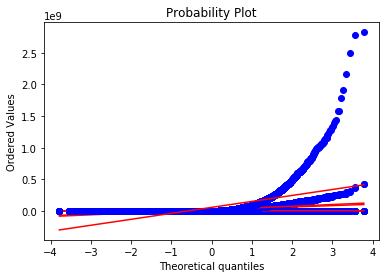

In [14]:
for i in train._get_numeric_data().columns.to_list():
    vals, model = probplot(train[i], plot=plt)
    print(i), print(model)

(317.1854691762457, 197.17933679223992, 0.5965756297041135)

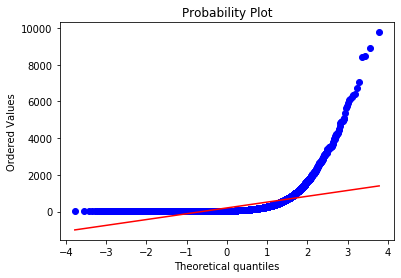

In [15]:
vals, model = probplot(train['vote_count'], plot=plt)
model

(1.3333195355497778, 4.025738328015387, 0.9525352115430009)

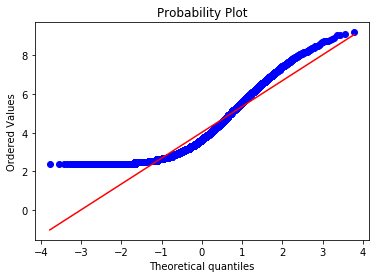

In [16]:
vals, model = probplot(np.log1p(train['vote_count']), plot=plt)
model

In [17]:
y = np.log1p(train['vote_count'])
X = train[['popularity']]
score = cross_val_score(estimator=lreg, X=X, y=y, scoring=root_mean_squared_error, cv=10)
score.mean()

0.8766248779703636

In [18]:
y = train['vote_count']
X = train[['popularity']]
score = cross_val_score(estimator=lreg, X=X, y=y, scoring=root_mean_squared_error, cv=10)
score.mean()

85576.4919830497

In [53]:
train.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,director1,director2
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,John Huston,2.227795e+07
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Other,0.000000e+00
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Other,2.897755e+08
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Gerald Thomas,0.000000e+00
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Other,0.000000e+00


#### Step 4).  Encoding the `Director` Column

The `Director` column is a good example of some of the challenges of dealing with categorical data.  If George Lucas or Steven Spielberg direct a film, there's a good chance that has a non-random impact on a film's bottom line.  However, there are a lot of unique values, most of which are probably non-impactful.  

Creating a column for everyone is probably not a good idea, but there's also no clear 'order' you could assign them just by looking at their labels.  

In this step you're going to try two different techniques to see which one works better on your dataset.

**Technique 1:**  Only include directors that have a value count of at least 10 *in your training set*, and set everything else to other.  

So:

 - transform the column accordingly (you can make a new column if that's easier)
 - transform the same column in your test set so that if a director's name *doesn't* appear in your new training column it gets set to `Other`

In [19]:
train['director'].head()

0        John Huston
1     Terence Fisher
2      Lewis Gilbert
3      Gerald Thomas
4    Budd Boetticher
Name: director, dtype: object

In [20]:
directors = train['director'
                 ].value_counts().to_frame()[train['director'].value_counts().to_frame().director > 9].index.to_list()

In [21]:
def f(row):
    if row['director'] in directors:
        val = row['director']
    else:
        val = 'Other'
    return val
train['director'] = train.apply(f, axis = 1)

In [22]:
test['director'] = test.apply(f, axis = 1)

In [23]:
train.director.head()

0      John Huston
1            Other
2            Other
3    Gerald Thomas
4            Other
Name: director, dtype: object

**Technique 2:** Use target encoding to transform the column instead, and use the results from your training set to transform your test set.  There are a lot of directors in your test set that are not in your training set, and this will result in missing values.  Fill these in with the column average.

**Bonus:** The method we're using here is a little blunt because our average value doesn't account for how often a particular value occurs.  A more nuanced approach to is to take some sort of weighted share between the overall column average and average of your particular unique value.  A good article on this is here:  https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

In [24]:
train2 = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/movies/train.csv')
test2 = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/movies/test.csv')

In [25]:
director_grouping = train2.groupby('director')['revenue'].mean()

In [26]:
director_grouping

director
 FrÃ©dÃ©ric Jardin                                    3.255239e+03
A.R. Murugadoss                                       7.697178e+07
Aaron Aites                                           0.000000e+00
Aaron Blaise|Robert Walker                            2.963382e+02
Aaron Harvey                                          0.000000e+00
Aaron Norris                                          7.468127e+06
Aaron Schneider                                       0.000000e+00
Aaron Seltzer|Jason Friedberg                         5.251334e+07
Aaron Woodley                                         0.000000e+00
Abbas Alibhai Burmawalla|Mastan Alibhai Burmawalla    0.000000e+00
Abbas Kiarostami                                      0.000000e+00
Abbas Tyrewala                                        1.124193e+07
Abe Sylvia                                            5.512500e+04
Abel Ferrara                                          1.152298e+06
Abel Ferry                                           

In [27]:
train2['director_map'] = train2.director.map(director_grouping)

In [28]:
train2.director_map.head()

0    2.227795e+07
1    0.000000e+00
2    2.897755e+08
3    0.000000e+00
4    0.000000e+00
Name: director_map, dtype: float64

In [29]:
test2['director_map'] = test.director.map(director_grouping)

In [30]:
test2.director_map.isna().value_counts()

True     1939
False      61
Name: director_map, dtype: int64

In [31]:
test2['director_map'] = test2.director_map.fillna(test2.director_map.mean())

In [32]:
test2.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,director_map
0,8866,2.944554,60000000,Jack Reacher,Tom Cruise|Rosamund Pike|Richard Jenkins|David...,http://www.jackreachermovie.com/,Christopher McQuarrie,The Law Has Limits. He Does Not.,based on novel|sniper|investigation|police|cha...,"In an innocent heartland city, five are shot d...",130,Crime|Drama|Thriller,Paramount Pictures|Mutual Film Company|Skydanc...,2012-12-20,2281,6.2,2012,56984656.88,1.111056e+08
1,8867,1.095339,35000000,This Is 40,Paul Rudd|Leslie Mann|Jason Segel|Maude Apatow...,http://www.thisis40movie.com/,Judd Apatow,The sort-of sequel to 'Knocked Up',family relationships|claim in title|singing in...,"Pete and Debbie are both about to turn 40, the...",134,Comedy,Apatow Productions,2012-12-20,693,5.5,2012,33241049.85,1.111056e+08
2,8868,0.158310,20000000,Not Fade Away,Bella Heathcote|Jack Huston|Dominique McElligo...,NaN,David Chase,there is no past no future either. just the Now--,new jersey|rock band|country club,"Set in suburban New Jersey in the 1960s, a gro...",112,Drama,Paramount Vantage,2012-12-21,14,5.4,2012,18994885.63,1.111056e+08
3,8869,0.055792,0,Minecraft: The Story of Mojang,Markus Persson|Jens Bergensten|Jakob Porser|Ca...,http://theminecraftmovie.com/,Paul Owens,NaN,NaN,"Follow Markus ""Notch"" Persson and his co-worke...",104,Documentary,2 Player Productions,2012-12-23,14,5.6,2012,0.00,1.111056e+08
4,8870,0.074508,0,Naughty or Nice,Hilarie Burton|Matt Dallas|Gabriel Tigerman|Da...,NaN,David Mackay,NaN,christmas,Krissy Kringle receives a delivery intended fo...,90,TV Movie,NaN,2012-12-24,10,7.1,2012,0.00,1.111056e+08


Use 10-fold univariate regression on both to see which one gives you a better result.

In [33]:
train['revenue'].mean()

54946959.57808753

In [34]:
# # X = train[['director_map']]
# y = np.log1p(train['revenue'])
# score = cross_val_score(estimator=lreg, X=X, y=y, scoring=root_mean_squared_error, cv=10)
# score.mean()

In [35]:
X = train
y = np.log1p(train['revenue'])
score = cross_val_score(estimator=lreg, X=pd.get_dummies(train['director'
                                                              ]), y=y, scoring=root_mean_squared_error, cv=10)
score.mean()

8.21541633289918e+24

In [36]:
train = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/movies/train.csv')
test = pd.read_csv('/Users/devonbancroft/Desktop/DAT-10-14/class material/Unit3/Data/movies/test.csv')

In [37]:
train['director'].fillna('Unknown', inplace=True)
test['director'].fillna('Unknown', inplace=True)

In [38]:
director_counts = train.groupby('director')['director'].transform('count')

In [39]:
train.groupby('director')['director'].transform('count')

0       12
1        8
2        7
3       12
4        1
5        4
6        1
7        5
8        2
9        9
10       3
11      10
12       5
13       1
14       2
15       3
16       2
17       2
18       7
19       1
20       2
21       1
22      10
23       9
24       2
25       1
26       5
27       2
28       1
29      10
        ..
8836     3
8837     2
8838    11
8839     1
8840     1
8841     2
8842     4
8843     1
8844    11
8845     3
8846     1
8847     3
8848     1
8849     1
8850     1
8851     1
8852     7
8853     1
8854     1
8855     5
8856     1
8857     2
8858     2
8859     1
8860     2
8861     2
8862     5
8863     4
8864     8
8865     1
Name: director, Length: 8866, dtype: int64

In [40]:
train['director1'] = np.where(director_counts > 10, train['director'], 'Other')

In [41]:
avg_director_gross = train.groupby('director')['revenue'].mean()

In [42]:
train['director2'] = train['director'].map(avg_director_gross)

In [43]:
train['director2'].isna().value_counts()

False    8866
Name: director2, dtype: int64

In [44]:
train['director2'].fillna(train['revenue'].mean(), inplace=True)

In [45]:
# your code here
dir_scores1 = cross_val_score(estimator=lreg, X=pd.get_dummies(train['director1']), y=y, scoring=mean_squared_log_error, cv=10)
dir_scores2 = cross_val_score(estimator=lreg, X=train[['director2']], y=y, scoring=mean_squared_log_error, cv=10)

In [46]:
# and the winner is....target encoding.....even if you remove the very strange fold the values are still higher
np.mean(dir_scores1), np.mean(dir_scores2)

(5.834357941873384e+22, 61.86438265013891)

In [47]:
train.director

0                    John Huston
1                 Terence Fisher
2                  Lewis Gilbert
3                  Gerald Thomas
4                Budd Boetticher
5                 Otto Preminger
6                 Michael Powell
7                      John Ford
8                    David Swift
9                   Billy Wilder
10                Richard Brooks
11                  Roger Corman
12                Stanley Kramer
13                    Wolf Rilla
14                   Irwin Allen
15                   Jerry Lewis
16                William Castle
17               Lewis Milestone
18              Alfred Hitchcock
19                    George Pal
20                   Karel Reisz
21          John Llewellyn Moxey
22                  Roger Corman
23               Stanley Kubrick
24                  George Cukor
25                  David Miller
26                  John Sturges
27                    John Wayne
28                 Frank Tashlin
29                    Don Siegel
          

#### Step 5).  Standardize Your Data using the `StandardScaler` module

 - make sure to `fit` it on the training set and `transform` it on the test set

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
sc = StandardScaler()

In [49]:
X = train[['popularity', ]]

In [50]:
train.head()

,id,popularity,budget,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue,director1,director2
0,0,0.421043,0,The Unforgiven,Burt Lancaster|Audrey Hepburn|Audie Murphy|Joh...,NaN,John Huston,A NEW TRIUMPH FROM ACADEMY AWARD WINNER JOHN H...,indian|texas|farm|siblings|saddle,The neighbors of a frontier family turn on the...,125,Action|Drama|Western,James Productions,1960-01-01,17,4.9,1960,0.0,0.0,John Huston,2.227795e+07
1,1,0.333643,0,The Brides of Dracula,Peter Cushing|Martita Hunt|Yvonne Monlaur|Fred...,NaN,Terence Fisher,He Turned Innocent Beauty Into Unspeakable Hor...,dracula|hammer horror|van helsing,A young teacher on her way to a position in Tr...,85,Horror,Hammer Film Productions|Hotspur Film Productio...,1960-01-01,19,6.6,1960,0.0,0.0,Other,0.000000e+00
2,2,0.194948,0,Sink the Bismarck!,Kenneth More|Dana Wynter|Carl MÃ¶hner|Laurence...,NaN,Lewis Gilbert,NaN,NaN,A true WW2 story: the British Navy must find a...,97,Action|Drama|Foreign|History|War,Twentieth Century Fox Film Corporation,1960-02-11,12,4.9,1960,0.0,0.0,Other,2.897755e+08
3,3,0.136525,0,Carry On Constable,Kenneth Connor|Charles Hawtrey|Sid James|Kenne...,NaN,Gerald Thomas,Oh! What a Carry On When that Crazy Bunch Join...,carry on|police station,"With a flu epidemic running rife, three new bu...",86,Comedy,Peter Rogers Productions,1960-02-22,10,6.0,1960,0.0,0.0,Gerald Thomas,0.000000e+00
4,4,0.267118,0,Comanche Station,Randolph Scott|Nancy Gates|Skip Homeier|Dyke J...,NaN,Budd Boetticher,The One-Man War Against The Comancheros!,indian|comanche,A man saves a woman who had been kidnapped by ...,73,Action|Western,Columbia Pictures Corporation|Ranown Pictures ...,1960-03-01,12,6.5,1960,0.0,0.0,Other,0.000000e+00


#### Step 6).  To get an estimate of your models performance, use 10-fold cross validation on your training set

#### Step 7).  Now, before making your final predictions for your test sit, fit the model on all of your training data

In [51]:
# your code here

#### Step 8).  Make a prediction on your test set, and save the results as a dataframe, using two columns:

 - **id**:  the id of your test set rows
 - **prediction**: your corresponding predictions
 
Submit this to a csv file, using the option `index=False`

In [52]:
# your code here